/home/nm/Bureau/Jupyter_dir/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:146: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


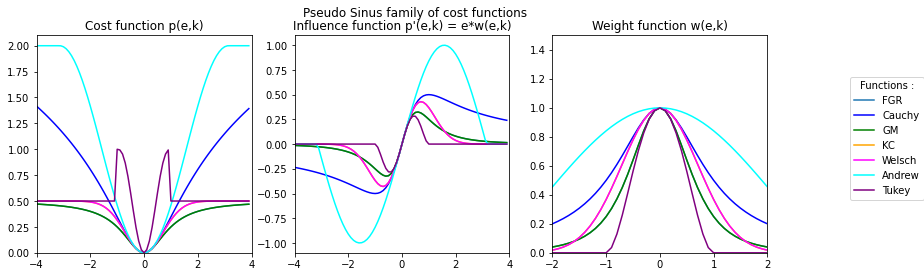

/home/nm/Bureau/Jupyter_dir/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:191: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


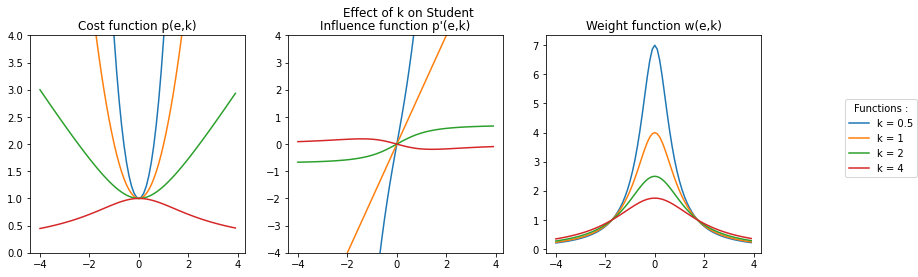

/home/nm/Bureau/Jupyter_dir/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:227: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


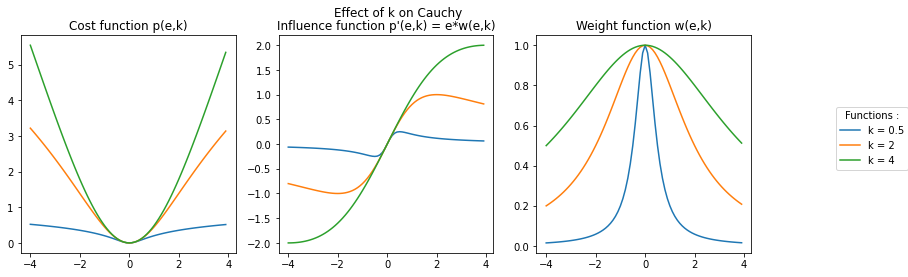

/home/nm/Bureau/Jupyter_dir/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:263: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


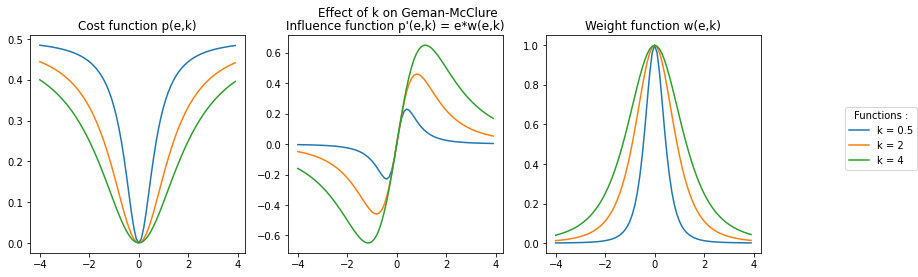

/home/nm/Bureau/Jupyter_dir/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:299: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


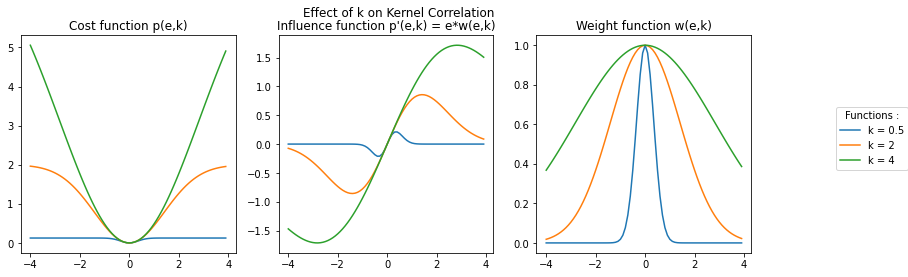

/home/nm/Bureau/Jupyter_dir/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:335: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


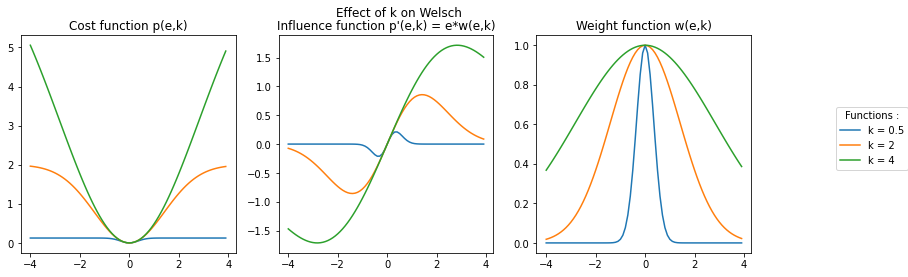

NameError: name 'ax4' is not defined

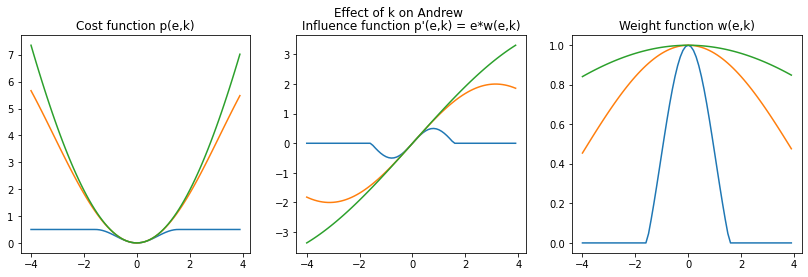

In [4]:
import matplotlib.pyplot as plt
import numpy as np

e = np.arange(-4,4,0.1)

#---------------------------PSEUDO SINUS FAMILY---------------------------------------------------
def FGR(e,k):
    p = (np.power(e,2)/2)/(k+np.power(e,2))
    w = np.power(k,2)/np.power((k+np.power(e,2)),2)
    i = w*e
    m = p*w
    return (p,w,i,m)

def derivative_approx(data_range,k):
    h = 0.00000000001
    top = np.exp(((-k+3)/2)*np.log((1+(np.power(e+h,2)/k)))) - np.exp(((-k+3)/2)*np.log((1+(np.power(e,2)/k))))
    bottom = h
    slope = top / bottom
    deriv_approx=slope
    return deriv_approx

def Student(e,k):
    p = np.exp(((-k+3)/2)*np.log((1+(np.power(e,2)/k))))
    w = (k+3)/(k+np.power(e,2))
    i = w*e
    i_d=derivative_approx(e,k)
    return (p,w,i,i_d)

def Cauchy(e,k):
    p = (np.power(k,2)/2)*np.log(1+np.power(e/k,2))
    w = 1/(1+np.power((e/k),2))
    i = w*e
    m = p*w
    return (p,w,i,m)

def GM(e,k):
    p = (np.power(e,2)/2)/(k+np.power(e,2))
    w = np.power(k,2)/np.power((k+np.power(e,2)),2)
    i = w*e
    m = p*w
    return (p,w,i,m)

def KC(e,k):
    p = (np.power(k,2)/2)*(1-np.exp(-np.power((e/k),2)))
    w = np.exp(-np.power((e/k),2))
    i = w*e
    m = p*w
    return (p,w,i,m)

def Welsch(e,k):
    p = (np.power(k,2)/2)*(1-np.exp(-np.power((e/k),2)))
    w = np.exp(-np.power((e/k),2))
    i = w*e
    m = p*w
    return (p,w,i,m)

def Tukey(e,k):
    p = [0 for i in range (e.size)]
    w = [0 for i in range (e.size)]
    m = [0 for i in range (e.size)]
    for i in range (e.size):
        if(np.absolute(e[i])<=k):
            p[i] = np.power(k,2)*(1-np.power((1-np.power(e[i]/k,2)),3))
            w[i] = np.power((1-np.power((e[i]/k),2)),2)
            m[i] = p[i]*w[i]
        else:
            p[i] = np.power(k,2)/2
            w[i] = 0
            m[i] = p[i]*w[i]
    i = w*e
    return (p,w,i,m)

def Andrew(e,k):
    p = [0 for i in range (e.size)]
    w = [0 for i in range (e.size)]
    m = [0 for i in range (e.size)]
    for i in range (e.size):
        if(np.absolute(e[i])<=(np.pi*k)):
            p[i] = np.power(k,2)*(1-np.cos(e[i]/k))
            w[i] = (k/e[i])*np.sin(e[i]/k)
            m[i] = p[i]*w[i]
        else:
            p[i] = 2*np.power(k,2)
            w[i] = 0
            m[i] = p[i]*w[i]
    i = w*e
    return (p,w,i,m)

#---------------------------PLOTTING-----------------------------------------------------------
(p_FGR,w_FGR,i_FGR,m_FGR) = FGR(e,1)
(p_Cauchy,w_Cauchy,i_Cauchy,m_Cauchy) = Cauchy(e,1)
(p_GM,w_GM,i_GM,m_GM) = GM(e,1)
(p_KC,w_KC,i_KC,m_KC) = KC(e,1)
(p_Welsch,w_Welsch,i_Welsch,m_Welsch) = Welsch(e,1)
(p_Andrew,w_Andrew,i_Andrew,m_Andrew) = Andrew(e,1)
(p_Tukey,w_Tukey,i_Tukey,m_Tukey) = Tukey(e,1)
(p_Student,w_Student,i_Student,i_d_Student) = Student(e,1)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4))
fig.suptitle('Pseudo Sinus family of cost functions')

# Labels to use in the legend for each line
line_labels = ["FGR", "Cauchy", "GM","KC","Welsch","Andrew","Tukey"]

# Create the sub-plots, assigning a different color for each line.
# Also store the line objects created

ax1.title.set_text('Cost function p(e,k)')
l1 = ax1.plot(e, p_FGR)[0]
l2 = ax1.plot(e, p_Cauchy, color="blue")[0]
l3 = ax1.plot(e, p_GM, color="green")[0]
l4 = ax1.plot(e, p_KC, color="orange")[0]
l5 = ax1.plot(e, p_Welsch, color="magenta")[0]
l6 = ax1.plot(e, p_Andrew, color="cyan")[0]
l7 = ax1.plot(e, p_Tukey, color="purple")[0]

ax2.title.set_text("Influence function p'(e,k) = e*w(e,k)")
l8 = ax2.plot(e, i_FGR)[0]
l9 = ax2.plot(e, i_Cauchy, color="blue")[0]
l10 = ax2.plot(e, i_GM, color="green")[0]
l11 = ax2.plot(e, i_KC, color="orange")[0]
l12 = ax2.plot(e, i_Welsch, color="magenta")[0]
l13 = ax2.plot(e, i_Andrew, color="cyan")[0]
l14 = ax2.plot(e, i_Tukey, color="purple")[0]

ax3.title.set_text('Weight function w(e,k)')
l15 = ax3.plot(e, w_FGR)[0]
l16 = ax3.plot(e, w_Cauchy, color="blue")[0]
l17 = ax3.plot(e, w_GM, color="green")[0]
l18 = ax3.plot(e, w_KC, color="orange")[0]
l19 = ax3.plot(e, w_Welsch, color="magenta")[0]
l20 = ax3.plot(e, w_Andrew, color="cyan")[0]
l21 = ax3.plot(e, w_Tukey, color="purple")[0]

ax1.set_xlim([-4,4])
ax1.set_ylim([0,2.1])
ax2.set_xlim([-4,4])
ax3.set_xlim([-2,2])
ax3.set_ylim([0,1.5])
# Create the legend
fig.legend([l1, l2, l3, l4, l5, l6, l7, l8, l9, l10, l11, l12, l13, l14, l15, l16, l17, l18],     # The line objects
           labels=line_labels,   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           title="Functions :",  # Title for the legend
           )
# Adjust the scaling factor to fit your legend text completely outside the plot
# (smaller value results in more space being made for the legend)
plt.subplots_adjust(right=0.85)
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4))
fig.suptitle('Effect of k on Student')

# Labels to use in the legend for each line
line_labels = ["k = 0.5","k = 1", "k = 2", "k = 4"]

(p,w,i,i_d) = Student(e,0.5)
l1 = ax1.plot(e, p)[0]
l2 = ax2.plot(e, i_d)[0]
l3 = ax3.plot(e, w)[0]

(p,w,i,i_d) = Student(e,1)
l1 = ax1.plot(e, p)[0]
l2 = ax2.plot(e, i_d)[0]
l3 = ax3.plot(e, w)[0]

(p,w,i,i_d) = Student(e,2)
l1 = ax1.plot(e, p)[0]
l2 = ax2.plot(e, i_d)[0]
l3 = ax3.plot(e, w)[0]

(p,w,i,i_d) = Student(e,4)
l1 = ax1.plot(e, p)[0]
l2 = ax2.plot(e, i_d)[0]
l3 = ax3.plot(e, w)[0]

ax1.set_ylim(0,4)
ax2.set_ylim(-4,4)

ax1.title.set_text('Cost function p(e,k)')
ax2.title.set_text("Influence function p'(e,k)")
ax3.title.set_text('Weight function w(e,k)') 

# Create the legend
fig.legend([l1, l2, l3],     # The line objects
           labels=line_labels,   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           title="Functions :",  # Title for the legend
           )
plt.subplots_adjust(right=0.85)
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4))
fig.suptitle('Effect of k on Cauchy')

# Labels to use in the legend for each line
line_labels = ["k = 0.5", "k = 2", "k = 4"]

(p,w,i,m) = Cauchy(e,0.5)
l1 = ax1.plot(e, p)[0]
l2 = ax2.plot(e, i)[0]
l3 = ax3.plot(e, w)[0]

(p,w,i,m) = Cauchy(e,2)
l1 = ax1.plot(e, p)[0]
l2 = ax2.plot(e, i)[0]
l3 = ax3.plot(e, w)[0]

(p,w,i,m) = Cauchy(e,4)
l1 = ax1.plot(e, p)[0]
l2 = ax2.plot(e, i)[0]
l3 = ax3.plot(e, w)[0]

    
ax1.title.set_text('Cost function p(e,k)')
ax2.title.set_text("Influence function p'(e,k) = e*w(e,k)")
ax3.title.set_text('Weight function w(e,k)') 

# Create the legend
fig.legend([l1, l2, l3],     # The line objects
           labels=line_labels,   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           title="Functions :",  # Title for the legend
           )
plt.subplots_adjust(right=0.85)
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4))
fig.suptitle('Effect of k on Geman-McClure')

# Labels to use in the legend for each line
line_labels = ["k = 0.5", "k = 2", "k = 4"]

(p,w,i,m) = GM(e,0.5)
l1 = ax1.plot(e, p)[0]
l2 = ax2.plot(e, i)[0]
l3 = ax3.plot(e, w)[0]

(p,w,i,m) = GM(e,2)
l1 = ax1.plot(e, p)[0]
l2 = ax2.plot(e, i)[0]
l3 = ax3.plot(e, w)[0]

(p,w,i,m) = GM(e,4)
l1 = ax1.plot(e, p)[0]
l2 = ax2.plot(e, i)[0]
l3 = ax3.plot(e, w)[0]

    
ax1.title.set_text('Cost function p(e,k)')
ax2.title.set_text("Influence function p'(e,k) = e*w(e,k)")
ax3.title.set_text('Weight function w(e,k)') 

# Create the legend
fig.legend([l1, l2, l3],     # The line objects
           labels=line_labels,   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           title="Functions :",  # Title for the legend
           )
plt.subplots_adjust(right=0.85)
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4))
fig.suptitle('Effect of k on Kernel Correlation')

# Labels to use in the legend for each line
line_labels = ["k = 0.5", "k = 2", "k = 4"]

(p,w,i,m) = KC(e,0.5)
l1 = ax1.plot(e, p)[0]
l2 = ax2.plot(e, i)[0]
l3 = ax3.plot(e, w)[0]

(p,w,i,m) = KC(e,2)
l1 = ax1.plot(e, p)[0]
l2 = ax2.plot(e, i)[0]
l3 = ax3.plot(e, w)[0]

(p,w,i,m) = KC(e,4)
l1 = ax1.plot(e, p)[0]
l2 = ax2.plot(e, i)[0]
l3 = ax3.plot(e, w)[0]

    
ax1.title.set_text('Cost function p(e,k)')
ax2.title.set_text("Influence function p'(e,k) = e*w(e,k)")
ax3.title.set_text('Weight function w(e,k)') 

# Create the legend
fig.legend([l1, l2, l3],     # The line objects
           labels=line_labels,   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           title="Functions :",  # Title for the legend
           )
plt.subplots_adjust(right=0.85)
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4))
fig.suptitle('Effect of k on Welsch')

# Labels to use in the legend for each line
line_labels = ["k = 0.5", "k = 2", "k = 4"]

(p,w,i,m) = Welsch(e,0.5)
l1 = ax1.plot(e, p)[0]
l2 = ax2.plot(e, i)[0]
l3 = ax3.plot(e, w)[0]

(p,w,i,m) = Welsch(e,2)
l1 = ax1.plot(e, p)[0]
l2 = ax2.plot(e, i)[0]
l3 = ax3.plot(e, w)[0]

(p,w,i,m) = Welsch(e,4)
l1 = ax1.plot(e, p)[0]
l2 = ax2.plot(e, i)[0]
l3 = ax3.plot(e, w)[0]

    
ax1.title.set_text('Cost function p(e,k)')
ax2.title.set_text("Influence function p'(e,k) = e*w(e,k)")
ax3.title.set_text('Weight function w(e,k)') 

# Create the legend
fig.legend([l1, l2, l3],     # The line objects
           labels=line_labels,   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           title="Functions :",  # Title for the legend
           )
plt.subplots_adjust(right=0.85)
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4))
fig.suptitle('Effect of k on Andrew')

# Labels to use in the legend for each line
line_labels = ["k = 0.5", "k = 2", "k = 4"]

(p,w,i,m) = Andrew(e,0.5)
l1 = ax1.plot(e, p)[0]
l2 = ax2.plot(e, i)[0]
l3 = ax3.plot(e, w)[0]

(p,w,i,m) = Andrew(e,2)
l1 = ax1.plot(e, p)[0]
l2 = ax2.plot(e, i)[0]
l3 = ax3.plot(e, w)[0]

(p,w,i,m) = Andrew(e,4)
l1 = ax1.plot(e, p)[0]
l2 = ax2.plot(e, i)[0]
l3 = ax3.plot(e, w)[0]

    
ax1.title.set_text('Cost function p(e,k)')
ax2.title.set_text("Influence function p'(e,k) = e*w(e,k)")
ax3.title.set_text('Weight function w(e,k)') 
ax4.title.set_text('Minimisation effect p(e,k)*w(e,k)')
# Create the legend
fig.legend([l1, l2, l3],     # The line objects
           labels=line_labels,   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           title="Functions :",  # Title for the legend
           )
plt.subplots_adjust(right=0.85)
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4))
fig.suptitle('Effect of k on Tukey')

# Labels to use in the legend for each line
line_labels = ["k = 0.5", "k = 2", "k = 4"]

(p,w,i,m) = Tukey(e,0.5)
l1 = ax1.plot(e, p)[0]
l2 = ax2.plot(e, i)[0]
l3 = ax3.plot(e, w)[0]

(p,w,i,m) = Tukey(e,2)
l1 = ax1.plot(e, p)[0]
l2 = ax2.plot(e, i)[0]
l3 = ax3.plot(e, w)[0]

(p,w,i,m) = Tukey(e,4)
l1 = ax1.plot(e, p)[0]
l2 = ax2.plot(e, i)[0]
l3 = ax3.plot(e, w)[0]

    
ax1.title.set_text('Cost function p(e,k)')
ax2.title.set_text("Influence function p'(e,k) = e*w(e,k)")
ax3.title.set_text('Weight function w(e,k)') 

# Create the legend
fig.legend([l1, l2, l3],     # The line objects
           labels=line_labels,   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           title="Functions :",  # Title for the legend
           )
plt.subplots_adjust(right=0.85)
plt.show()